# Pymaceuticals Inc.
---

## Analysis

- Results of the mean and median of the tumor volume for each drug regimen display Capomulin having smaller tumor sizes than most of the other regimens with a slight exclusion of Ramicane. 

- Looking specifically into one mouse, l509, we can see that treatment did result in a lower tumor size than when he started the treatment. However, the first 20 days showed significant growth of the tumor. Five days after the peak of his tumor growth, l509 saw a rapid decrease in tumor size, followed by an uptick in growth within the next five days, and then experienced another rapid decrease over the next following five days. Unfortunately for l509, after day 35, his tumor started growing again and had not shown signs of dropping when treatment ended at day 45. The results of l509 pose concern about the permanency of tumor shrinkage, and further data should be gathered on the tumor volume over time for the other mice receiving Capomulin. As well as for Ramicane. Due to their similarities in average tumor size, it'd be pertinent to see if both show implications for tumor regrowth or not. 

- Overall, I believe further data should be taken to compare Capomulin against its strongest competitor, Ramicane, more so than other regimens, and to look further into the timeline of growth, make sure they are experiencing similar tumor weight to mouse weight correlation/regression, and look further into potential concerns of permanency of the tumor shrinkage. 


## Prepping the Data

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import sem
from scipy.stats import linregress

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
full_mouse_study_df = pd.merge(mouse_metadata, study_results, on=["Mouse ID"], how="right")
full_mouse_study_df = full_mouse_study_df[["Mouse ID", "Timepoint", "Tumor Volume (mm3)", 
                                 'Metastatic Sites', 'Drug Regimen','Sex','Age_months',
                                 'Weight (g)']]
# Display the data table for preview
full_mouse_study_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [2]:
# Current number of mice
len(full_mouse_study_df["Mouse ID"].unique())

249

In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint.
dup_mice = full_mouse_study_df[full_mouse_study_df[["Mouse ID", "Timepoint"]].duplicated() == True]
dup_mice["Mouse ID"].unique()

array(['g989'], dtype=object)

In [4]:
# All the data for the duplicate mouse ID. 
duplicate_mouse_df = full_mouse_study_df.loc[full_mouse_study_df["Mouse ID"] == "g989",:]
duplicate_mouse_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [5]:
# Removing g989 w/ proof mouse count change
mouse_study_df = full_mouse_study_df.set_index("Mouse ID")
mouse_study_df = mouse_study_df.drop("g989")
mouse_study_df = mouse_study_df.reset_index()
len(mouse_study_df["Mouse ID"].unique())

248

## Summary Statistics

In [6]:
# Groupby's to gather DataFrame data
tumor_mean = mouse_study_df.groupby(["Drug Regimen"]).mean(numeric_only=True)["Tumor Volume (mm3)"]
tumor_median = mouse_study_df.groupby(["Drug Regimen"]).median(numeric_only=True)["Tumor Volume (mm3)"]
tumor_var = mouse_study_df.groupby(["Drug Regimen"]).var(numeric_only=True)["Tumor Volume (mm3)"]
tumor_std = mouse_study_df.groupby(["Drug Regimen"]).std(numeric_only=True)["Tumor Volume (mm3)"]
tumor_sem = mouse_study_df.groupby(["Drug Regimen"]).sem(numeric_only=True)["Tumor Volume (mm3)"]

# Stats Summary DataFrame
Drug_stats_df = pd.DataFrame({"Mean Tumor Volume":tumor_mean , "Median Tumor Volume": tumor_median, 
                  "Tumor Volume Variance":tumor_var, "Tumor Volume Std. Dev.":tumor_std, "Tumor Volume Std. Err.":tumor_sem})
Drug_stats_df

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [7]:
# Aggregation method
tumor_agg = mouse_study_df.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].agg(["mean","median","var","std","sem"])
tumor_agg

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

In [8]:
# Bar Data
drug_reg = mouse_study_df.groupby(["Drug Regimen"])["Timepoint"].count().sort_values(ascending=False)

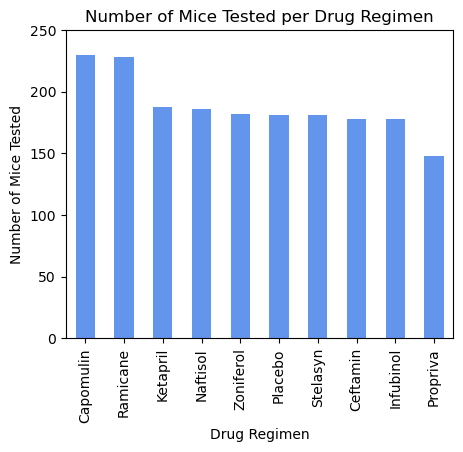

In [22]:
# DataFrame.plot() method
fig1 = drug_reg.plot(kind="bar", facecolor="cornflowerblue", figsize=(5,4), title = "Number of Mice Tested per Drug Regimen",
              ylabel="Number of Mice Tested",ylim=(0,250))
xticklabels = drug_reg.index
fig1.set_xticklabels(xticklabels)
plt.show()

Text(0, 0.5, 'Number of Mice Tested')

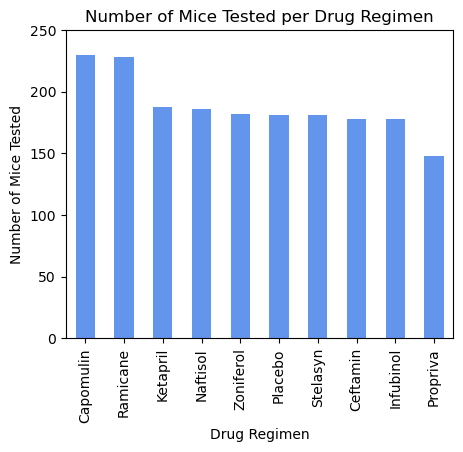

In [23]:
# Pyplot method of same graph
y_axis = drug_reg
x_axis = np.arange(len(drug_reg))
tick_loc = [value for value in x_axis]
tick_names = ["Capomulin", "Ramicane", "Ketapril", "Naftisol", "Zoniferol",
              "Placebo", "Stelasyn", "Ceftamin", "Infubinol", "Propriva"]
plt.figure(figsize=(5,4))
plt.bar(x_axis, y_axis, color= "cornflowerblue", align="center", width = 0.5)
plt.xticks(tick_loc, tick_names , rotation="vertical")
plt.xlim(-.5, len(x_axis)-.5)
plt.ylim(0, max(drug_reg)+20)
plt.title("Number of Mice Tested per Drug Regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Mice Tested")

In [11]:
#Pie Chart Data
count1 = mouse_study_df.groupby(['Sex'])
count2 = count1[["Mouse ID"]].count()
total = mouse_study_df[["Mouse ID"]].count()
percent = count2/total*100

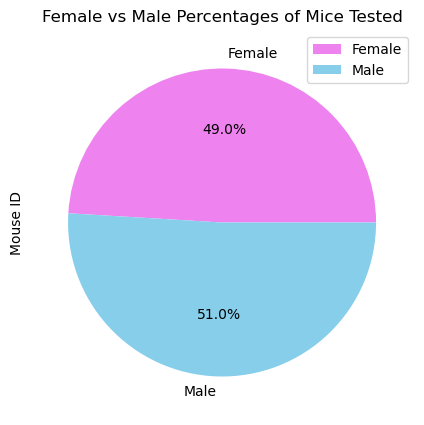

In [24]:
# DataFrame method
color =["violet","skyblue"]
fig2 = percent.plot(kind="pie", y="Mouse ID", figsize=(5,5), colors=color, title = "Female vs Male Percentages of Mice Tested", autopct="%1.1f%%")

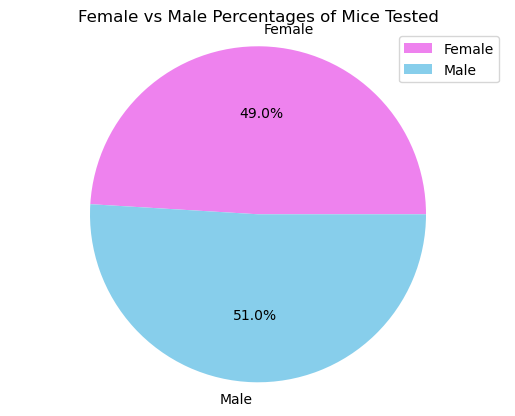

In [25]:
# Pyplot method
labels=["Female", "Male"]
sex_per = percent["Mouse ID"]
colors = ["violet","skyblue"]
plt.pie(sex_per, labels=labels, colors=colors, autopct="%1.1f%%")
plt.title("Female vs Male Percentages of Mice Tested")
plt.legend(["Female", "Male"], loc="best")
plt.axis("equal")
plt.show()

## Quartiles, Outliers and Boxplots

In [14]:
#Merged DataFrame of last timepoint for each mouse 
step1 = mouse_study_df.groupby(["Mouse ID"])['Timepoint'].max()
merged_df = pd.merge(step1, mouse_study_df, on=["Mouse ID", "Timepoint"], how="left")
merged_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a203,45,67.973419,2,Infubinol,Female,20,23
1,a251,45,65.525743,1,Infubinol,Female,21,25
2,a262,45,70.717621,4,Placebo,Female,17,29
3,a275,45,62.999356,3,Ceftamin,Female,20,28
4,a366,30,63.440686,1,Stelasyn,Female,16,29
...,...,...,...,...,...,...,...,...
243,z435,10,48.710661,0,Propriva,Female,12,26
244,z578,45,30.638696,0,Ramicane,Male,11,16
245,z581,45,62.754451,3,Infubinol,Female,24,25
246,z795,45,65.741070,3,Naftisol,Female,13,29


In [15]:
#lists and for loop to find the IQR's, quantiles, and bounds to ultimately find the outliers
drug_list = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

tumor_vol_list = []
for drug in drug_list:
    
    final_vols = merged_df.loc[merged_df['Drug Regimen']==drug, 'Tumor Volume (mm3)']
    tumor_vol_list.append(final_vols)
    
    # Determine outliers using upper and lower bounds
    quantiles = final_vols.quantile([.25, .5, .75])
    upperq = quantiles[.75]
    lowerq = quantiles[.25]
    IQR = upperq - lowerq
    upperbound = upperq + (1.5*IQR)
    lowerbound = lowerq - (1.5*IQR)
    outliers = final_vols.loc[(final_vols > upperbound) | (final_vols < lowerbound)]
    
    print(f"{drug}'s outliers: {outliers}")

Capomulin's outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane's outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol's outliers: 31    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin's outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


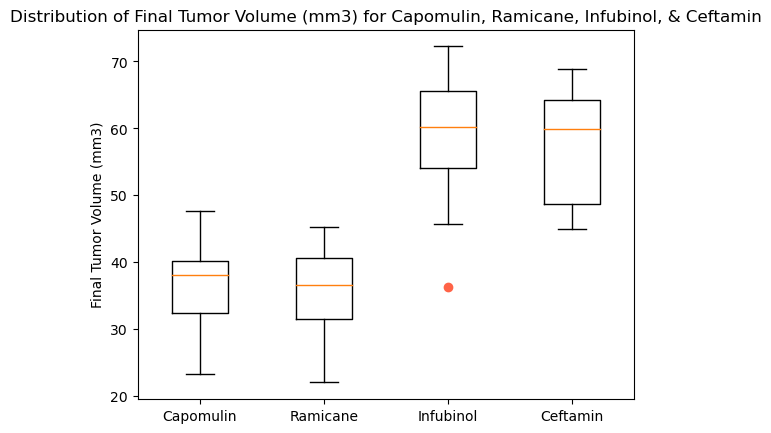

In [28]:
# Boxplot 
fig3, ax1 = plt.subplots()
ax1.set_ylabel("Final Tumor Volume (mm3)")
ax1.boxplot(tumor_vol_list, sym="tomato")
plt.title("Distribution of Final Tumor Volume (mm3) for Capomulin, Ramicane, Infubinol, & Ceftamin")
plt.xticks([1,2,3,4], drug_list)
plt.show()

## Line and Scatter Plots

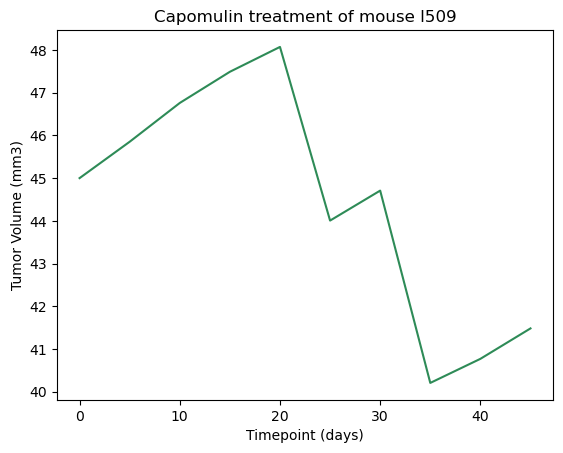

In [31]:
# Line plot of mouse l509's journey with Capomulin
# Data collection
m = mouse_study_df.set_index('Mouse ID')
mousey_l509 = m.loc["l509",["Timepoint","Tumor Volume (mm3)"]]
# Graph
x_axis = mousey_l509["Timepoint"]
fig4 = plt.plot(x_axis, mousey_l509["Tumor Volume (mm3)"], color= "seagreen")
plt.title("Capomulin treatment of mouse l509")
plt.ylabel("Tumor Volume (mm3)")
plt.xlabel("Timepoint (days)")
plt.show()

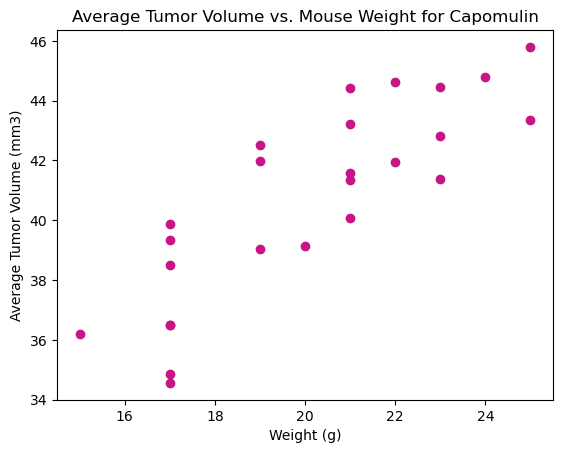

In [29]:
# Scatter Plot of Capomulin's averages 
# Data collection
cap_specific = mouse_study_df.loc[mouse_study_df["Drug Regimen"] == "Capomulin"]
cap_specific.sort_values("Mouse ID", ascending = True)

weight = cap_specific.groupby(["Mouse ID"])['Weight (g)'].mean()
tumor = cap_specific.groupby(["Mouse ID"])['Tumor Volume (mm3)'].mean()

capomulin_average = pd.DataFrame({"Weight (g)":weight, "Tumor Volume (mm3)":tumor})

# Graph
plt.scatter(capomulin_average['Weight (g)'],capomulin_average['Tumor Volume (mm3)'], color="mediumvioletred")
plt.title("Average Tumor Volume vs. Mouse Weight for Capomulin")
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.show()

## Correlation and Regression

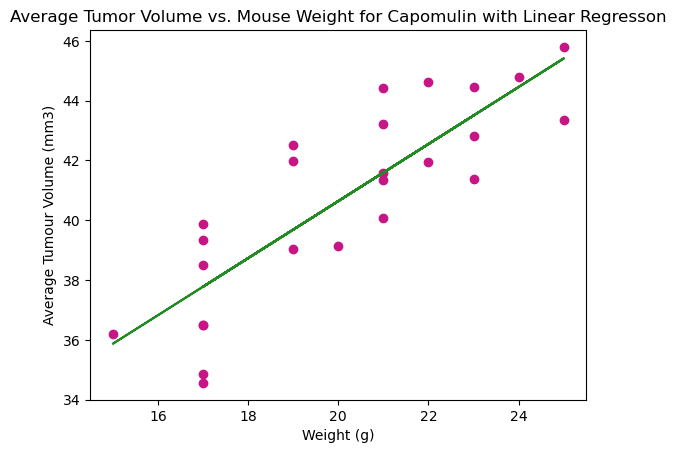

In [30]:
#Linear Regression 
x = capomulin_average['Weight (g)']
y = capomulin_average['Tumor Volume (mm3)']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x,y)
regress_values = x * slope + intercept
plt.scatter(x,y,color="mediumvioletred")
plt.plot(x,regress_values,color="forestgreen")
plt.title("Average Tumor Volume vs. Mouse Weight for Capomulin with Linear Regresson")
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumour Volume (mm3)")
plt.show()

In [20]:
# Correlation
weight_c = capomulin_average.iloc[:,0]
tumor_c = capomulin_average.iloc[:,1]
correlation = st.pearsonr(weight_c,tumor_c)
print(f'The correlation between mouse weight and the average tumor volume is {round(correlation[0],2)}')

The correlation between mouse weight and the average tumor volume is 0.84
